In [110]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
import csv
import matplotlib.pyplot as plt

def unpickle(file):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

d1 = unpickle('../content/data_batch_1')
d2 = unpickle('../content/data_batch_2')
d3 = unpickle('../content/data_batch_3')
d4 = unpickle('../content/data_batch_4')
d5 = unpickle('../content/data_batch_5')
d6 = unpickle('../content/test_batch')
meta = unpickle('../content/batches.meta')

print('Read Data Successfully')

Read Data Successfully


In [111]:
#Build the data and lable arrays
labels = d1[b'labels']
labels = np.append(labels,d2[b'labels'])
labels = np.append(labels,d3[b'labels'])
labels = np.append(labels,d4[b'labels'])
labels = np.append(labels,d5[b'labels'])
labels = np.append(labels,d6[b'labels'])

data = d1[b'data']
data = np.append(data,d2[b'data'], axis=0)
data = np.append(data,d3[b'data'],axis=0)
data = np.append(data,d4[b'data'],axis=0)
data = np.append(data,d5[b'data'],axis=0)
data = np.append(data,d6[b'data'],axis=0)

label_names = meta[b'label_names']

for i in range(len(label_names)):
  label_names[i] = str(label_names[i])
  label_names[i] = label_names[i][2:len(label_names[i])-1]

print('Read Labels and data Successfully')

Read Labels and data Successfully


In [112]:
#Split data as per labels
d = {}

for i in np.unique(labels):
  rownum = np.where(labels[:] == i)
  d[i] = data[rownum]

print('data split based on labels done')



data split based on labels done


In [113]:

'''
mean_image = np.empty((1,3072))
image_info = {}
err = np.empty((10,10))
l_avg_err = []
for i in d:
  pca = PCA(20)
  pca.fit(d[i])
  for j in (d):
    t_data = pca.transform(d[j])
    it_data = pca.inverse_transform(t_data)
    if i == j:
      mean_image = np.append(mean_image,pca.mean_.reshape(1,3072), axis=0)
      ed = np.square(paired_distances(d[i],it_data))
      avg_error = np.mean(ed)
      l_avg_err.append(avg_error)
    err[j,i] = np.mean(np.square(paired_distances(d[j],it_data)))                      
  image_info[i] = (mean_image[i],t_data,d[i],it_data,ed, avg_error)


print("transformed data and converted the images")


mean_image = mean_image[1:,:]
mean_ed = euclidean_distances(mean_image,mean_image, squared = True)
print('matrix for part b complete')


with open("partb_distances.csv", "w") as csvfile:
    filewriter = csv.writer(csvfile, delimiter=",")
    filewriter.writerows(mean_ed)
    
print("partb_distances.csv")

err_c = np.empty((10,10))

for i in range(10):
  for j in range(10):
    err_c[i,j] = (err[i,j]+err[j,i])/2
print('matrix for part c complete')

with open("partc_distances.csv", "w") as csvfile:
    filewriter = csv.writer(csvfile, delimiter=",")
    filewriter.writerows(err_c)
    
print("partc_distances.csv")

'''

'\nmean_image = np.empty((1,3072))\nimage_info = {}\nerr = np.empty((10,10))\nl_avg_err = []\nfor i in d:\n  pca = PCA(20)\n  pca.fit(d[i])\n  for j in (d):\n    t_data = pca.transform(d[j])\n    it_data = pca.inverse_transform(t_data)\n    if i == j:\n      mean_image = np.append(mean_image,pca.mean_.reshape(1,3072), axis=0)\n      ed = np.square(paired_distances(d[i],it_data))\n      avg_error = np.mean(ed)\n      l_avg_err.append(avg_error)\n    err[j,i] = np.mean(np.square(paired_distances(d[j],it_data)))                      \n  image_info[i] = (mean_image[i],t_data,d[i],it_data,ed, avg_error)\n\n\nprint("transformed data and converted the images")\n\n\nmean_image = mean_image[1:,:]\nmean_ed = euclidean_distances(mean_image,mean_image, squared = True)\nprint(\'matrix for part b complete\')\n\n\nwith open("partb_distances.csv", "w") as csvfile:\n    filewriter = csv.writer(csvfile, delimiter=",")\n    filewriter.writerows(mean_ed)\n    \nprint("partb_distances.csv")\n\nerr_c = np.e

# **Another Attempt**

In [114]:
mean_image_x = np.empty((1,3072))
image_info_x = {}
err_x = np.empty((10,10))
l_avg_err_x = []
for i in d:
  pca = PCA(20)
  pca.fit(d[i])
  (wi, vi) = (pca.explained_variance_,pca.components_)
  #(wi,vi)= np.linalg.eig(np.cov(d[i], rowvar = False))
  #idx = np.argsort(wi)[::-1]
  #vi = vi[:,idx]
  #wi = wi[idx]
  #vi = vi.T
  #vi = vi[:20,:]
  #wi = wi[:20]

  for j in (d):
    
    if i == j:
      t_data_j = pca.transform(d[j])
      it_data_j = pca.inverse_transform(t_data_j)
      mean_image_x = np.append(mean_image_x,pca.mean_.reshape(1,3072), axis=0)
      ed_x = np.square(paired_distances(d[i],it_data_j))
      avg_error_x = np.mean(ed_x)
      l_avg_err_x.append(avg_error_x)
      
    else:
      mean_image_j = np.mean(d[j], axis=0).reshape(1,3072)
      #pc_data = (np.repeat(mean_image_j,6000, axis=0)).T
      #for k in range(20):
        #pc_data = pc_data + np.multiply(np.dot(vi[k,:].reshape(1,3072),(d[j]-mean_image_j).T),np.repeat(vi[k,:].reshape(3072,1),6000, axis=1))
      
      #mean_image_j = pca.mean_.reshape(1,3072)
      #t_data_j = np.dot((d[j]-mean_image_j), vi.T) 
      #it_data_j = np.dot(t_data,vi)+mean_image_j
      it_data_j = mean_image_j + np.dot(np.dot((d[j]-mean_image_j), vi.T), vi) 
      #it_data_j=pc_data.T
    err_x[j,i] = np.mean(np.square(paired_distances(d[j],it_data_j)))                      
  image_info_x[i] = (mean_image_x[i],t_data_j,d[i],it_data_j,ed_x, avg_error_x)


print("transformed data and converted the images")

mean_image_x = mean_image_x[1:,:]
mean_ed_x = euclidean_distances(mean_image_x,mean_image_x, squared = True)
print('matrix for part b complete')


with open("partb_distances.csv", "w") as csvfile:
    filewriter = csv.writer(csvfile, delimiter=",")
    filewriter.writerows(mean_ed_x)
    
print("partb_distances.csv")

err_c_x = np.empty((10,10))

for i in range(10):
  for j in range(10):
    err_c_x[i,j] = (err_x[i,j]+err_x[j,i])/2
print('matrix for part c complete')

with open("partc_distances.csv", "w") as csvfile:
    filewriter = csv.writer(csvfile, delimiter=",")
    filewriter.writerows(err_c_x)
    
print("partc_distances.csv")


transformed data and converted the images
matrix for part b complete
partb_distances.csv
matrix for part c complete
partc_distances.csv


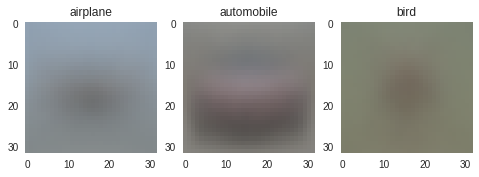

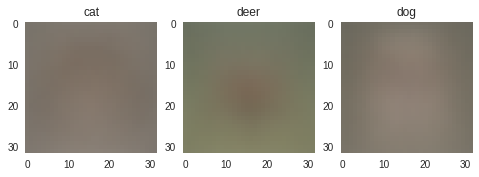

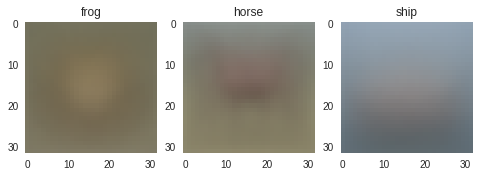

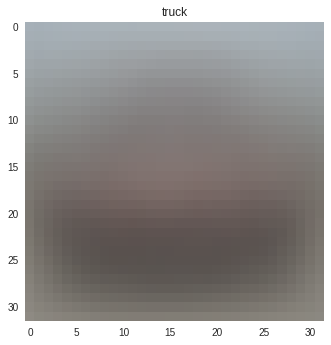

In [115]:
#print mean image here for each class: use mean_image

image_title = 'mean_image'
for i in range(10):
  array= np.asarray(mean_image_x[i])
  title = label_names[i]
  if i<9:
    if i%3 ==0:
      f, a= plt.subplots(1,3)
    a[i%3].grid(False)
    a[i%3].set_title(title)
    a[i%3].imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)
    if i%3 ==2:
      plt.show()
  else:
    f, a= plt.subplots()
    a.grid(False)
    a.set_title(title)
    a.imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)
    plt.show()
    



In [116]:
#print mean image here for each class: use mean_image
'''
image_title = 'mean_image'
for i in range(10):
  array= np.asarray(mean_image[i])
  title = label_names[i]
  if i<9:
    if i%3 ==0:
      f, a= plt.subplots(1,3)
    a[i%3].grid(False)
    a[i%3].set_title(title)
    a[i%3].imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)
    if i%3 ==2:
      plt.show()
  else:
    f, a= plt.subplots()
    a.grid(False)
    a.set_title(title)
    a.imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)
    plt.show()
 '''   
      
  

"\nimage_title = 'mean_image'\nfor i in range(10):\n  array= np.asarray(mean_image[i])\n  title = label_names[i]\n  if i<9:\n    if i%3 ==0:\n      f, a= plt.subplots(1,3)\n    a[i%3].grid(False)\n    a[i%3].set_title(title)\n    a[i%3].imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)\n    if i%3 ==2:\n      plt.show()\n  else:\n    f, a= plt.subplots()\n    a.grid(False)\n    a.set_title(title)\n    a.imshow(((array.reshape(3,1024).T).reshape(32,32,3))/255)\n    plt.show()\n "

In [117]:
#Create a bar graph using image_info avg_error
'''
l_avg_err = []
for i in image_info:
  avg_error = image_info[i][5]
  l_avg_err.append(avg_error)

f, a= plt.subplots()
f.set_size_inches(12, 8.5)

a.set_xlabel('Class/Category')
a.set_ylabel('Square Error')
a.set_title('Class Error')

plt.bar(np.unique(labels),l_avg_err,.8, tick_label =label_names )
plt.show
'''

"\nl_avg_err = []\nfor i in image_info:\n  avg_error = image_info[i][5]\n  l_avg_err.append(avg_error)\n\nf, a= plt.subplots()\nf.set_size_inches(12, 8.5)\n\na.set_xlabel('Class/Category')\na.set_ylabel('Square Error')\na.set_title('Class Error')\n\nplt.bar(np.unique(labels),l_avg_err,.8, tick_label =label_names )\nplt.show\n"

<function matplotlib.pyplot.show>

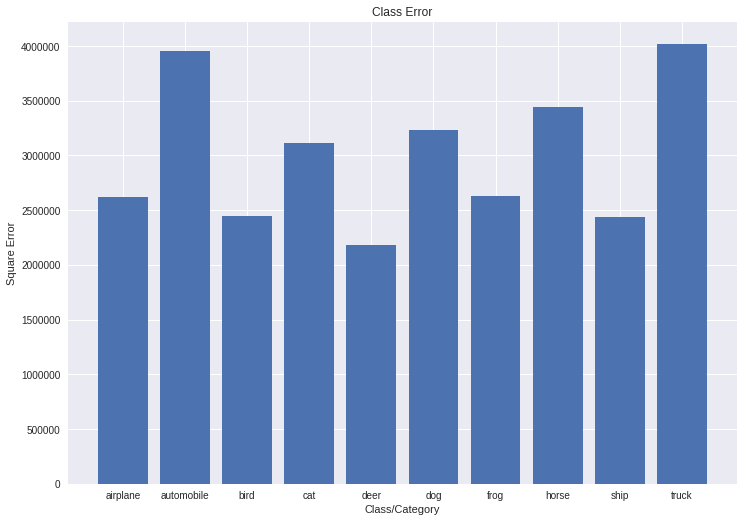

In [118]:
l_avg_err = []
for i in image_info_x:
  avg_error = image_info_x[i][5]
  l_avg_err.append(avg_error)

f, a= plt.subplots()
f.set_size_inches(12, 8.5)

a.set_xlabel('Class/Category')
a.set_ylabel('Square Error')
a.set_title('Class Error')

plt.bar(np.unique(labels),l_avg_err,.8, tick_label =label_names )
plt.show

In [0]:
#perform principal cordinate analysis (MDS) on mean_ed and create scatter plot

def MDS(D):
  A = (np.identity(10) - (np.ones((10,10))/10))
  W = (np.dot(np.dot(A,D),A.T))/-2
  (w,v)= np.linalg.eig(W)
  idx = np.argsort(w)[::-1]
  v = v[:,idx]
  w = w[idx]
  
  v = v.T
  w = np.sqrt(w[:2])
  v = v[:2,:]
  w = np.diag(w)
  points = np.dot(w,v)
  return(points)
  


In [120]:
'''  
p2= MDS(mean_ed)
p3 = MDS(err_c)


f, ax = plt.subplots()
ax.scatter(p2[0, :], p2[1, :])
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')

for i in  range(len(label_names)):
  ax.annotate(label_names[i],(p2[0, i],p2[1, i]))
'''

"  \np2= MDS(mean_ed)\np3 = MDS(err_c)\n\n\nf, ax = plt.subplots()\nax.scatter(p2[0, :], p2[1, :])\nax.set_xlabel('Component 0')\nax.set_ylabel('Component 1')\n\nfor i in  range(len(label_names)):\n  ax.annotate(label_names[i],(p2[0, i],p2[1, i]))\n"

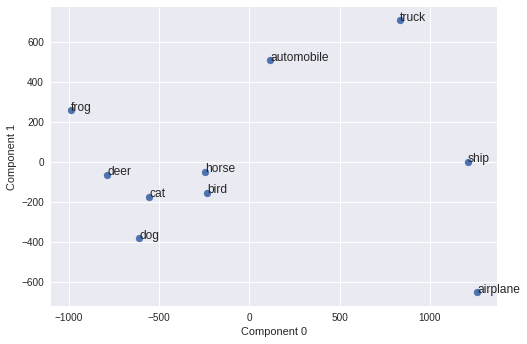

In [121]:
px2= MDS(mean_ed_x)
px3 = MDS(err_c_x)


f, ax = plt.subplots()
ax.scatter(px2[0, :], px2[1, :])
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')

for i in  range(len(label_names)):
  ax.annotate(label_names[i],(px2[0, i],px2[1, i]))

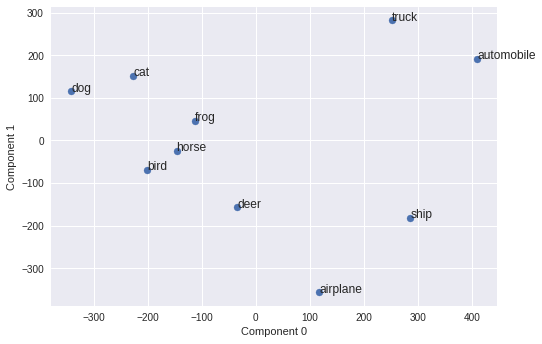

In [122]:
f, ax = plt.subplots()
ax.scatter(px3[0, :], px3[1, :])
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')


for i in  range(len(label_names)):
  ax.annotate(label_names[i],(px3[0, i],px3[1, i]))

In [123]:
'''
f, ax = plt.subplots()
ax.scatter(p3[0, :], p3[1, :])
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')


for i in  range(len(label_names)):
  ax.annotate(label_names[i],(p3[0, i],p3[1, i]))
  '''

"\nf, ax = plt.subplots()\nax.scatter(p3[0, :], p3[1, :])\nax.set_xlabel('Component 0')\nax.set_ylabel('Component 1')\n\n\nfor i in  range(len(label_names)):\n  ax.annotate(label_names[i],(p3[0, i],p3[1, i]))\n  "